In [3]:
#导入所需基础包
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Load Iris data 数据加载

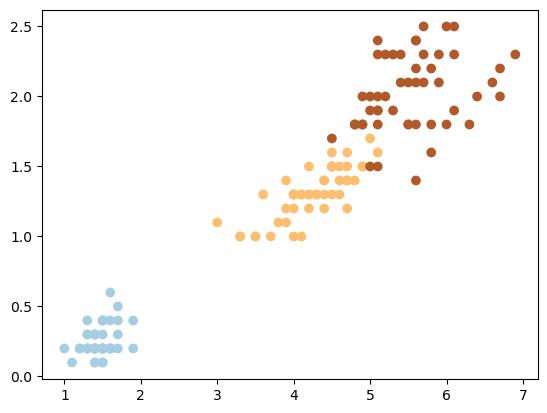

In [4]:
iris = datasets.load_iris()
#iris为numpy类型，其有属性分别data和target：data为150*4的矩阵，取data的所有行和第3、4列；target为150*1的列向量
#实现用X作为特征，y值作为标签
#补全下述代码
X = iris.data[:,2:4]
y = iris.target

#数据可视化
#plt.scatter第一个参数为X第一列，第二个参数为X的第二列，第三个参数c=y,  第四个参数cmap=plt.cm.Paired
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.show()

### split train and test sets 训练集和测试集划分

In [5]:
from sklearn.model_selection import train_test_split
#使用train_test_split进行数据集的切分，随机种子为123，训练集：测试集=7:3
#补全下述代码
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Normalize the data  数据标准化处理

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#讲实例化后的sc对象作为标准化对象，采用transform方法，分别传入X_train和X_test作为待处理参数
#补全下述代码
sc.fit(X)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

### 模型训练

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time
#仿照今天的课程内容完成'Logistic Regression', 'Random Forest','AdaBoost','SVM','KNN'五种算法的实例化
#补全下述代码
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = AdaBoostClassifier()
clf4 = svm.SVC(C=1.0, kernel='rbf',decision_function_shape='ovr',gamma=0.01) # kernel为径向基函数
clf5 = KNeighborsClassifier(n_neighbors=5)
#仿照今天的课程完成五折交叉验证过程，效果类似下图所示,但记住不能直接照抄，因为此时数据经过了标准化
for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Logistic Regression', 'Random Forest','AdaBoost','SVM','KNN']):
    start = time.time()
    
    #五折交叉验证
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    
    end = time.time()
    running_time = end - start
    print("Accuracy: %0.4f (+/- %0.2f),耗时%0.2f秒。模型名称[%s]" %(scores.mean(), scores.std(), running_time, label))


Accuracy: 0.9619 (+/- 0.06),耗时0.02秒。模型名称[Logistic Regression]
Accuracy: 0.9429 (+/- 0.07),耗时0.21秒。模型名称[Random Forest]
Accuracy: 0.9429 (+/- 0.07),耗时0.14秒。模型名称[AdaBoost]
Accuracy: 0.9143 (+/- 0.06),耗时0.00秒。模型名称[SVM]
Accuracy: 0.9524 (+/- 0.05),耗时0.01秒。模型名称[KNN]


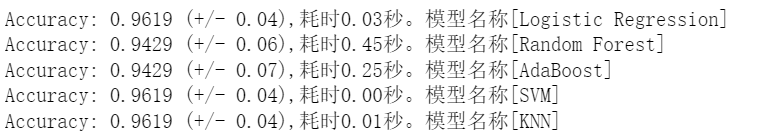

### Visualization 二维数据可视化 多项式核函数

In [8]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0]-1,axis[1]+1,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-1,axis[3]+1,int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

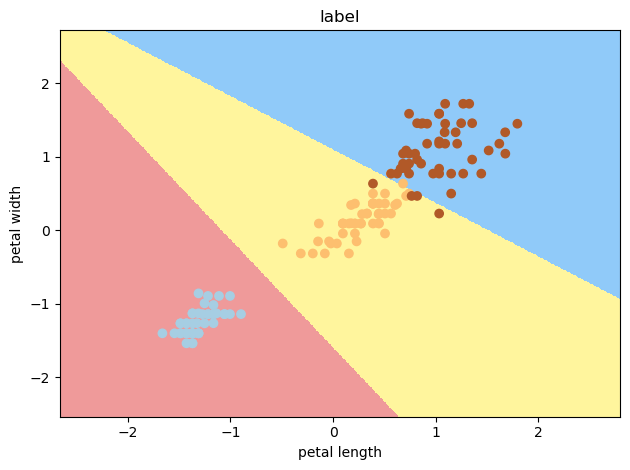

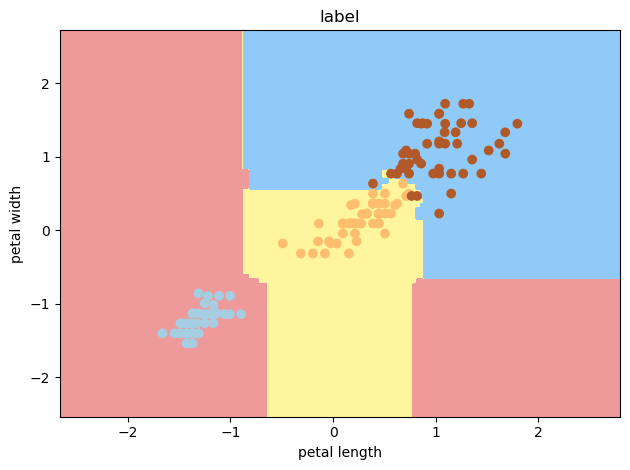

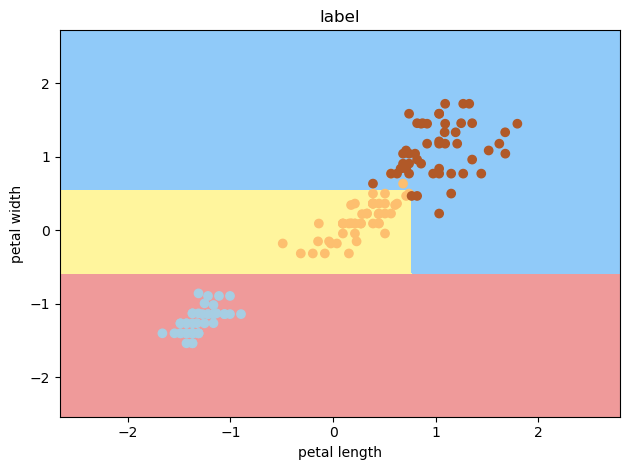

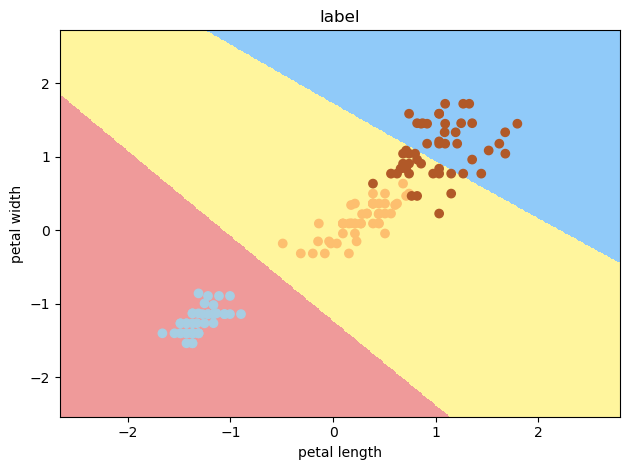

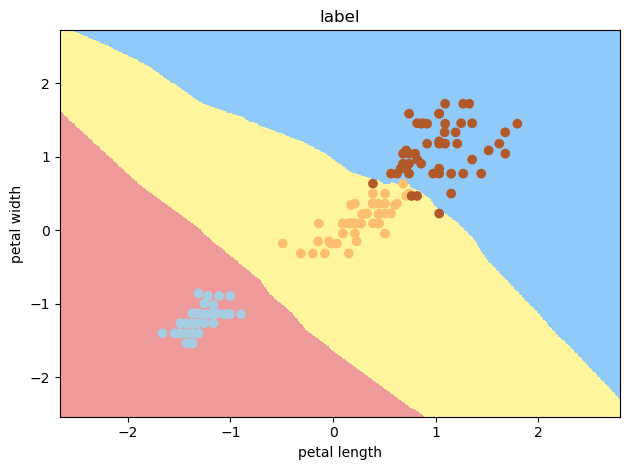

In [9]:
#图像可视化
for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Logistic Regression', 'Random Forest','AdaBoost','SVM','KNN']):
    x_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    clf.fit(X_train_std,y_train)
    
    #min_1和max_1分别为 x_combined_std第一列的最小值和最大值
    min_1, max_1 = x_combined_std[:,0].min(),x_combined_std[:,0].max()

    #min_2和max_2分别为 x_combined_std第二列的最小值和最大值
    min_2, max_2 = x_combined_std[:,1].min(),x_combined_std[:,1].max()
    
    #plot_decision_boundary函数第一个参数为分类器，第二个参数为[min_1, max_1, min_2, max_2]
    plot_decision_boundary(clf,axis=[min_1, max_1, min_2, max_2])
        
    
    #plt.scatter第一个参数为x_combined_std第一列，第二个参数为x_combined_std的第二列，
    #第三个参数c=y_combined,  第四个参数cmap=plt.cm.Paired
    plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combined,cmap=plt.cm.Paired)
    
        
    #xlabel为'petal length',ylabel为'petal width'，title为变量label的值，补全注释掉的下述代码
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('label')
    plt.tight_layout()
    plt.show()
    
